# Objectives

In this notebook we will learn:

    Regularization - ways to control m and b values in $y=mx+b$ so that we get the best fit. Different Regularization techniques:
    
        a) LASSO 
        
        b) Ridge
        
        c) Elastic Net

## Regularization 

Regularization is a technique to overcome both overfitting or underfitting of the data. For this example I am using 
mean squared error loss. 

$ \text{Loss} = \text{L} = \sum (\text{actual value} - \text{predicted value})^2 $

If $L$ represents the loss function then our goal is to 

minimize (L + regularization term) = $ minimize (\sum (y_j - \hat{y_j})^2 + \lambda ||w||)$

Note: $ L = \sum (y_j - \hat{y_j})^2 $ where 

$\hat{y} = w_0 + w_1 x$

$w_0$ is same as $b$ and $w_1$ is same as $m.$

Below we have different regularization with the norms:

L1 norm: 

$$ ||w||_1 =  \sum |w_i| $$

L2 norm: 

$$ ||w||_2^2  =  \sum w^2_i $$

where $w$ is a matrix that contains coefficients for the different features and $\lambda$ is a regularization parameter. 

If $\lambda$ is large then the weights have to become zero to avoid overfitting. This might result in a simple model. 
$ \lambda$ can takes values between 0 and a large number. To find the best $\lambda$ we have to experiment with sub-samples.

### Different Regularizations for Linear Regressions

Least Absolute Shrinkage and Selection Operator (LASSO) regression  uses the $L_1$ regularization. 
This is used when we have more number of features. If a feature is not improtant then 
Lasso regression can make that particular feature weight zero. 

Ridge regression uses $L_2$ regularization. This is used to prevent multicollinearity. 

The value of $\alpha$ controls the penalty term. If $\alpha$ is very high, then the penalty is high and thus, 
the magnitude of the coefficients will be small.

#### Important Note: In sklearn for Lasso, Ridge and Elastic, alpha is same as $\lambda$ in the regularization equation. 

#### Hyperparamters are the parameters that the user has to provide manually. Here $\alpha$ is a hyperparameter. 

Elastic net regression is a combination of both L1 and L2 regularization. 

$min( L + \lambda_1 ||w||_1 + \lambda_2 ||w||_2^2) $

$\alpha = \lambda_1 + \lambda_2 $ and 

$l1\_ratio = \frac{\lambda_1}{\lambda_1 + \lambda_2} $

$l1\_ratio = 1$ can only happen when $\lambda_1 = 1$ and $\lambda_2 = 0,$ this will result in Lasso regression.

$l1\_ratio = 0$ can only happen when $\lambda_1 = 0$ and this will result in Ridge regression.

For $l1\_ratio$ between 0 and 1, we get Elastic net regression.

In [81]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

### Preparing data

For this study, we will consider auto_mpg dataset. 

In [83]:
auto = pd.read_csv('auto_mpg.csv')

print(auto.columns)
print(auto.shape)

Index(['mpg', 'cylinder', 'displacement', 'horse power', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
(398, 9)


In [84]:
display(auto)

,mpg,cylinder,displacement,horse power,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [85]:
print(auto.dtypes)

mpg             float64
cylinder          int64
displacement    float64
horse power      object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


##### Observation from the above cell
Notice that the column horse power is of type object, so let's convert it to float.

In [87]:
# Let's typecast horse power to float
#auto["horse power"] = auto["horse power"].astype(float)

##### Observation from the above cell after applying astype

The above conversion gave an error as there is "?" in horse power column that could not be converted to float. 

We will try to print the unique values that are in the horse power column.

In [89]:
print(auto["horse power"].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


##### Observation from the above cell after applying unique() method

We notice that there is "?."

In the horse power column, we will drop the rows with "?."

In [91]:
# we will consider all rows where horse power is not "?"

auto = auto[auto["horse power"] != "?"]
auto["horse power"] = auto["horse power"].astype(float)

In [92]:
auto.shape

(392, 9)

In [93]:
auto = auto[["mpg", "cylinder", "displacement", "horse power", "weight", "acceleration"]].copy(deep=True)

#### Correlation plot using Seaborn pairplot

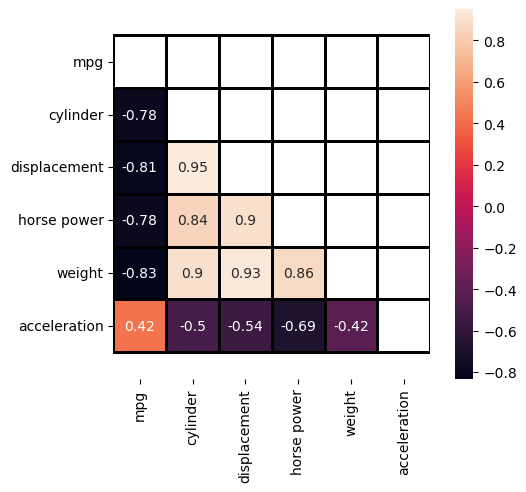

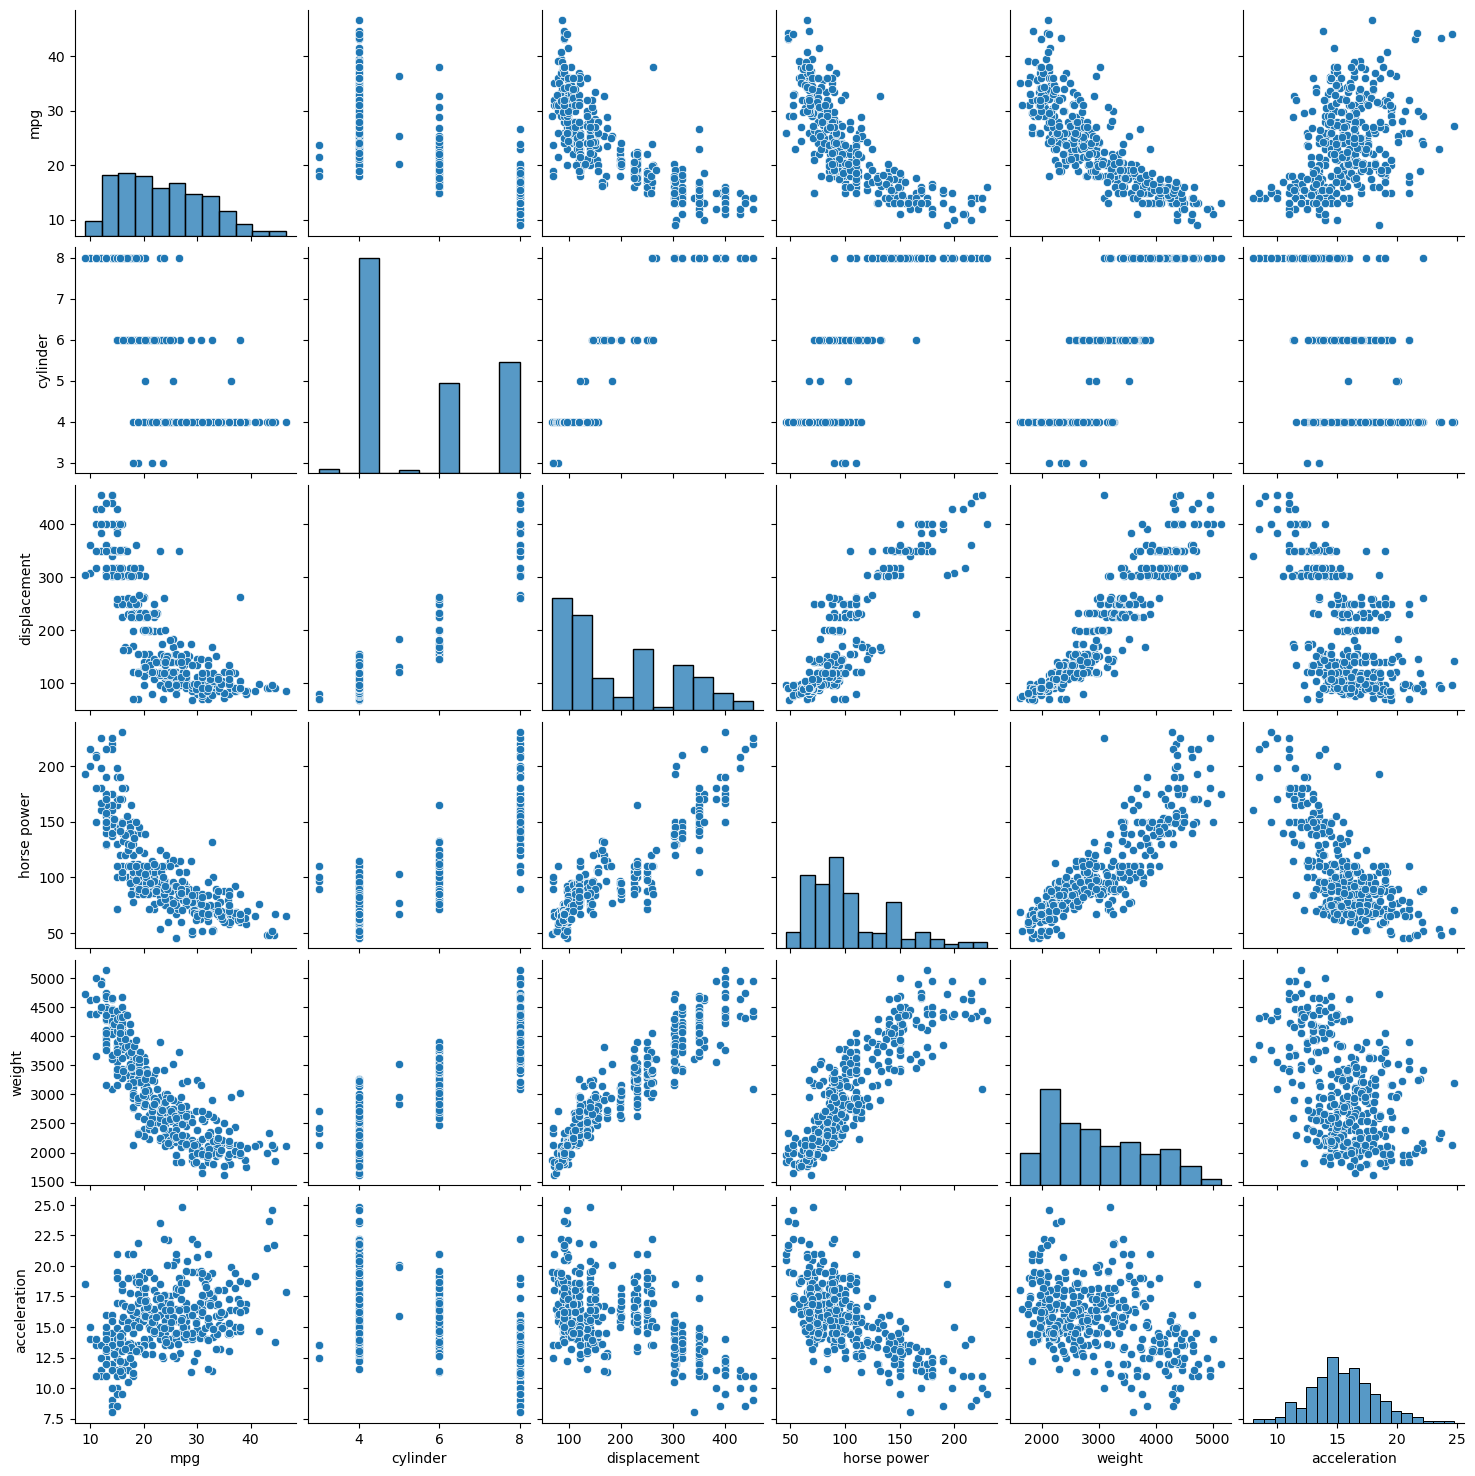

In [95]:
sns.pairplot(auto)
plt.show()

#### Correlation coefficient Matrix

In [97]:
matrix = np.triu(auto.corr())

ax = sns.heatmap(auto.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

##### Observation from the heatmap

From the heatmap, we can make the following observations:

    1) displacement and cylinder are positively correlated
    
    2) horse power is positively correlated with displacement and cylinder
    
    3) weight is positively correlated with displacement and cylinder and horse power.

### Features for our model

We want to consider displacement, horse power and weight.

Let's create a dataframe, autox that comprises of only 3 independent features.

### Scaling the features and Building the model

In [101]:
autox = auto[["displacement", "horse power", "weight"]].copy(deep=True)
autoy = auto[["mpg"]].copy(deep=True)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train, x_test, y_train, y_test = train_test_split(autox, \
                                                    autoy, \
                                                    test_size=0.2, \
                                                    random_state=4)

scaler_fit = scaler.fit(x_train) # this will return mean and standard deviation for the x_train

xtrain = scaler_fit.transform(x_train)
xtest = scaler_fit.transform(x_test)

print(xtest[0:5])
print(xtrain[0:5])

ytrain = y_train
ytest = y_test

[[-0.4761767  -0.40076887 -0.04782516]
 [ 1.58874789  1.55330452  1.84968846]
 [-0.05335881 -0.69930786  0.72765934]
 [-0.88916162 -0.61788813 -0.92751538]
 [-0.4761767  -0.29220924 -0.07811752]]
[[-0.89899459 -0.40076887 -0.96871299]
 [ 0.60545046 -0.8350074   0.27690897]
 [-0.20085342  0.79338709 -0.02359127]
 [ 0.42845693 -0.34648905  0.18845527]
 [ 2.0803966   1.96040315  2.67848752]]


In [102]:
ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)

In [103]:
# fit_transform in one step
"""
xtrain_2 = scaler.fit_transform(x_train)
xtest_2 = scaler.fit_transform(x_test)

print(xtest_2[0:5])
print(xtrain_2[0:5])

ytrain_2 = y_train
ytest_2 = y_test
"""

'\nxtrain_2 = scaler.fit_transform(x_train)\nxtest_2 = scaler.fit_transform(x_test)\n\nprint(xtest_2[0:5])\nprint(xtrain_2[0:5])\n\nytrain_2 = y_train\nytest_2 = y_test\n'

Explanation for Cross Validation

p1, p2, p3, p4, p5

first pass
train - p1, p2, p3, and p4

test - p5


second pass

train - p1, p2, p3, and p5

test - p4

third pass

train - p1, p2, p4, and p5

test - p3

fourth pass

train - p1, p5, p3, and p4

test - p2

fifth pass

train - p5, p2, p3, and p4

test - p1

## LASSO on scaled features

Hyperparameter tuning

We will use LassoCV to find the best alpha for the Lasso model. 

We give a tuple of values to alphas parameter. 

In [106]:
from sklearn.linear_model import Lasso, LassoCV


In [107]:
lasso_cv = LassoCV(alphas = (0.2, 1, 5, 10), cv = 10, max_iter = 100000)
lasso_cv.fit(xtrain, ytrain)

LassoCV(alphas=(0.2, 1, 5, 10), cv=10, max_iter=100000)

In [108]:
# the best alpha for Lasso is 

alpha_for_lasso = lasso_cv.alpha_
alpha_for_lasso

0.2

In [109]:
# specifying a value for our regularization parameter
lassoReg = Lasso(alpha=alpha_for_lasso) 

lassoReg.fit(xtrain, ytrain)

pred = lassoReg.predict(xtest)
print(pred.shape, ytest.shape)

# calculating mse

mse_test = mean_squared_error(ytest, pred)

mse_train = mean_squared_error(ytrain, lassoReg.predict(xtrain))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

# returns the r-squared value of train set
r2_lasso_train= lassoReg.score(xtrain,ytrain) 

# returns the r-squared value of test set
r2_lasso_test= lassoReg.score(xtest,ytest) 

print("r2_lasso_train: ", r2_lasso_train)
print("r2_lasso_test: ", r2_lasso_test)

print(lassoReg.coef_, lassoReg.intercept_)

(79,) (79,)
mse_train:  17.917627943705586
mse_test:  17.86472012942062
r2_lasso_train:  0.6972438657099914
r2_lasso_test:  0.7262379350613692
[-0.29910916 -1.11556123 -4.93719471] 23.74600638977636


##### Observations from LASSO regression:

    1) The r-squared values for train and test are okay.

The Lasso equation

auto_mpg = -0.29910916* displacement-1.11556123* horse_power-4.93719471* weight + 23.74600638977636

## Ridge Regression on scaled features

In [112]:
from sklearn.linear_model import Ridge, RidgeCV

In [113]:
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(xtrain, ytrain)

RidgeCV(alphas=array([1.54087569, 5.48140357, 3.45978074, 7.02665625, 1.11043056,
       3.02143721, 4.82557248, 0.33119748, 1.41891243, 4.37153435,
       4.81996737, 4.29133095, 0.39210812, 9.0641741 , 5.37278217,
       4.56666196, 4.51722813, 7.48852727, 4.83463244, 0.47339377,
       1.22059172, 4.88849088, 9.84327629, 1.0990806 , 9.03874464,
       9.39894161, 8.38285233, 6.12081419, 7.73980011, 5.42862178,
       0.80443275, 9.31604477, 9.26956286, 4.77884686, 8.41094253,
       0.31025105, 7.91176894, 8.01646469, 1.79592891, 0.3035553 ,
       0.34742557, 9.82503815, 4.45822221, 8.23083455, 2.76445343,
       5.73962525, 5.46564966, 2.8483349 , 2.83584409, 9.75353226]),
        cv=10)

In [114]:
alpha_for_ridge = ridge_cv.alpha_
alpha_for_ridge

3.4597807383290236

In [115]:
# Building the Ridge model with the right alpha

#training the model 

ridgeReg = Ridge(alpha_for_ridge)

ridgeReg.fit(xtrain,ytrain)

pred = ridgeReg.predict(xtest)

mse_test = mean_squared_error(ytest, pred)

mse_train = mean_squared_error(ytrain, ridgeReg.predict(xtrain))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

# Calculating r-squared of Ridge Regression

# returns the r-squared value of train set
r2_ridge_train = ridgeReg.score(xtrain, ytrain)

# returns the r-squared value of test set
r2_ridge_test = ridgeReg.score(xtest,ytest) 

print("r2_ridge_train: ", r2_ridge_train)
print("r2_ridge_test: ", r2_ridge_test)
print(ridgeReg.coef_, ridgeReg.intercept_)

mse_train:  17.891150667384075
mse_test:  17.594351835566
r2_ridge_train:  0.6976912551663869
r2_ridge_test:  0.7303811056167075
[-0.65910478 -1.24601137 -4.63453758] 23.74600638977636


#### Observations from Ridge regression:

1) None of the coefficients are zero.

2) the R-squared values are not that bad. 

We can consider Ridge regression model for this dataset. 

## Elastic Net Regression on scaled features

In [118]:
# Elastic Net code
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [119]:
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10)
elastic_net_cv.fit(xtrain, ytrain)

ElasticNetCV(cv=10)

In [120]:
alpha_for_elastic = elastic_net_cv.alpha_
alpha_for_elastic

0.016907442800833995

In [121]:
enReg = ElasticNet(alpha=alpha_for_elastic, l1_ratio=0.5)

enReg.fit(xtrain, ytrain)

pred_en = enReg.predict(xtest)
print(pred_en.shape)
print(ytest.shape)

# calculating mse

mse_test = mean_squared_error(ytest, pred)

mse_train = mean_squared_error(ytrain, enReg.predict(xtrain))

print("mse_train: ", mse_train)
print("mse_test: ", mse_test)

# Calculating r-squared of Elastic Net

# returns the r-squared value of train set
r2_en_train= enReg.score(xtrain,ytrain) 

# returns the r-squared value of test set
r2_en_test= enReg.score(xtest,ytest) 

print("r2_en_train: ", r2_en_train)
print("r2_en_test: ", r2_en_test)

print(enReg.coef_, enReg.intercept_)

(79,)
(79,)
mse_train:  17.88532686990279
mse_test:  17.594351835566
r2_en_train:  0.6977896605143414
r2_en_test:  0.7296170291217132
[-0.59258686 -1.23269991 -4.71143737] 23.74600638977636


#### Observations from Elastic Net regression:

1) None of the coefficients are zero.

2) the R-squared values are not that bad. 

We can consider Elastic Net regression model for this dataset. 

### Coefficients from different regularizations

Lasso 

[-0.29910916 -1.11556123 -4.93719471] 23.74600638977636

Ridge

[-0.64899617 -1.24441657 -4.64726895] 23.74600638977636

ElasticNet

[-0.59258686 -1.23269991 -4.71143737] 23.74600638977636


In [124]:
"""
In-class activity: For the auto_mpg data, can you use features: weight, cylinder and horse power and build Lasso, Ridge 
and ElasticNet regularization models. Find the appropriate alpha for each model using the methods shown above. 
"""

'\nIn-class activity: For the auto_mpg data, can you use features: weight, cylinder and horse power and build Lasso, Ridge \nand ElasticNet regularization models. Find the appropriate alpha for each model using the methods shown above. \n'

In [175]:
"""
In-class activity: For the auto_mpg data, can you use features: weight, cylinder and horse power and build Linear Regression model. Find the appropriate alpha for each model using the methods shown above. 
"""
from sklearn.preprocessing import StandardScaler
a_scaler = StandardScaler() # creating an instance of Standard Scaler
auto_independent = a_scaler.fit_transform(auto[['weight','cylinder', 'horse power']])
# after scaling
auto_independent[0:5]
x_train, x_test, y_train, y_test = train_test_split(auto_independent, auto["mpg"], test_size=0.2, random_state=4)
# we have to fit the data
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

yhat = reg.predict(x_test) 
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, yhat)
print(mse_test)

# y_t_predict is the predicted y values for the x_train data
y_t_predict = reg.predict(x_train)

# note that y_train is the true y value
mse_train = mean_squared_error(y_train, y_t_predict)
print(mse_train)

r1 = mse_test/mse_train

diff1 = np.abs((mse_train - mse_test)/mse_train)

print(r1)

print(diff1)

from sklearn.metrics import r2_score

print("r-squared for the test data: ", r2_score(y_test, yhat))
    
print("r-squared for the train data: ", r2_score(y_train, y_t_predict))

17.74873660949394
17.853614229726983
0.994125692485367
0.00587430751463299
r-squared for the test data:  0.7280152866058631
r-squared for the train data:  0.6983255124908376
